# Tuning Deep Learning Network model

In [5]:
from src.batch_tuning import base_model_config, get_data, create_and_run_model
from src.utils import plot_graph

### Batch size tuning

**Batch Size** - A set of samples sent trough ANN in a single pass

> Higher the batch size

> - Faster training
> - More memory required
> - Better GPU utilization
> - Instability during training progress

> Lower the batch size
> - Slower training
> - Less memory required
> - Poor GPU utilization
> - Stability during training progress

> Recommendation
>
> - Experiment with batch size (optimal around 32)

In [ ]:
# Batch size experiment

#Initialize the measures
accuracy_measures = {}

for batch_size in range(16,128,16):
    
    #Load default configuration
    model_config = base_model_config()
    #Acquire and process input data
    X,Y = get_data()
    
    #set epoch to 20
    model_config["EPOCHS"]=20
    
    #Set batch size to experiment value
    model_config["BATCH_SIZE"] = batch_size
    model_name = "Batch-Size-" + str(batch_size)
    
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]
    
plot_graph(accuracy_measures, "Compare quantity of batch size")

After running experiment , the following observations were made:
- Batch size of 16 and 32 performed better than the rest 
- 16 best accuracy but more epochs needed
- 32 gets fast accuracy on the first epoch, but decreases after that

# Hidden layer tuning

> **More layers**
>
> - Possibility to learn complex relationships
> - More training and inference time and cost
> - Overfitting to training set

> **Less layers**
> 
> - Less training and inference time and cost
> - Less overfitting to training set
> - Less complex relationships learned

> **Recommendations**
>
> - Two layers found sufficient for most problems
> - Experiment with more layers for complex problems
> - Increase based on experimentation

In [ ]:
# Hidden layer experiment

accuracy_measures = {}
layer_list =[]
for layer_count in range(1,6): # 1 to 5 layers
    
    #32 nodes in each layer
    layer_list.append(32)
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["HIDDEN_NODES"] = layer_list # set the hidden nodes
    model_name = "Layers-" + str(layer_count) # set the model name
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]
    
accuracy_measures = {}

activation_list = ['relu', 'sigmoid', 'tanh']

for activation in activation_list:
    model_config = base_model_config()
    X, Y = get_data()

    model_config["HIDDEN_ACTIVATION"] = activation
    model_name = "Model-" + activation
    history = create_and_run_model(model_config, X, Y, model_name)

    accuracy_measures["Model-" + activation] = history.history["accuracy"]

plot_graph(accuracy_measures, "Compare quantity of layers")

After running experiment , the following observations were made:
- 2 layers performed better than the rest
- Optimal Epochs for 2 layers is 2
- 2 layers is sufficient for most problems
- Increasing layers may lead to overfitting and more training time

# Node layer tuning

> **More nodes**
> 
> - More complex relationships learned
> - More training and inference time and cost
> - Overfitting to training set
> - More memory required

> **Less nodes**
> 
> - Less complex relationships learned
> - Less training and inference time and cost
> - Less overfitting to training set
> - Less memory required
> 
> **Recommendations**
> 
> - Start with 32 nodes
> - Experiment with more nodes for complex problems
> - Increase based on experimentation
> - Decrease based on overfitting
> - Optimal node count between 32 and 64 but not more than 128

In [ ]:
# Node layer experiment

accuracy_measures = {}

for node_count in range(8, 40, 8):

    # have 2 hidden layers in the networks
    layer_list = []
    for layer_count in range(2):
        layer_list.append(node_count)

    model_config = base_model_config()
    X, Y = get_data()

    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Nodes-" + str(node_count)
    history = create_and_run_model(model_config, X, Y, model_name)

    accuracy_measures[model_name] = history.history["accuracy"]

plot_graph(accuracy_measures, "Compare Batch Size and Epoch")

After running experiment , the following observations were made:
- 16 nodes performed better than the rest result ( best on 3 epochs)
- 8 nodes more stable on more epochs ( after 6 epochs)

# Choosing activation functions

> **Hidden layer activation function**
> - ReLU (Rectified Linear Unit) - Most common (range 0 to infinity)
> - Sigmoid - Used in output layer for binary classification (range 0 to 1)
> - Tanh - Used in output layer for binary classification (range -1 to 1)
> 
> **Output layer activation function**
> - Sigmoid - Binary classification
> - Softmax - Multi-class classification
> - Linear - Regression


******************************************************


Model: "Model-relu"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense-Layer-0 (Dense)           │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense-Layer-1 (Dense)           │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467 (9.64 KB)

 Trainable params: 2,467 (9.64 KB)

 Non-trainable params: 0 (0.00 B)


******************************************************


Model: "Model-sigmoid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense-Layer-0 (Dense)           │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense-Layer-1 (Dense)           │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467 (9.64 KB)

 Trainable params: 2,467 (9.64 KB)

 Non-trainable params: 0 (0.00 B)


******************************************************


Model: "Model-tanh"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense-Layer-0 (Dense)           │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense-Layer-1 (Dense)           │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467 (9.64 KB)

 Trainable params: 2,467 (9.64 KB)

 Non-trainable params: 0 (0.00 B)

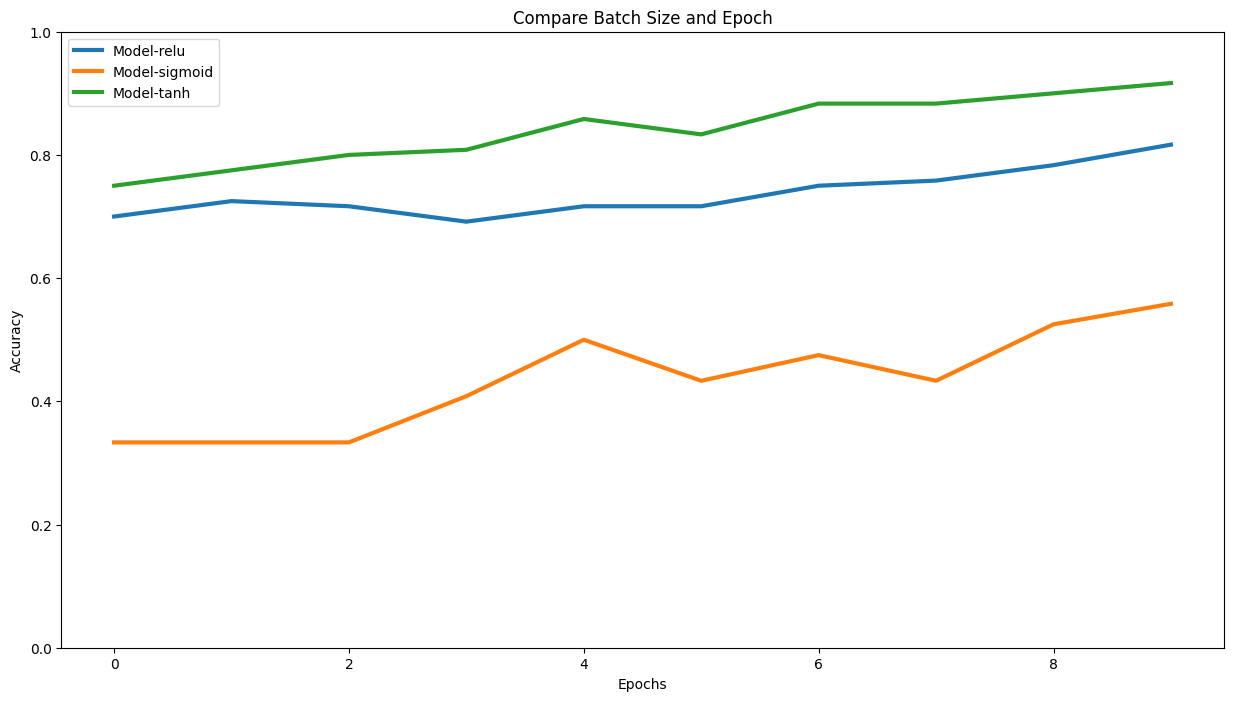

In [6]:
# Activation function experiment

accuracy_measures = {}

activation_list = ['relu', 'sigmoid', 'tanh']

for activation in activation_list:
    model_config = base_model_config()
    X, Y = get_data()

    model_config["HIDDEN_ACTIVATION"] = activation
    model_name = "Model-" + activation
    history = create_and_run_model(model_config, X, Y, model_name)

    accuracy_measures["Model-" + activation] = history.history["accuracy"]

plot_graph(accuracy_measures, "Compare Batch Size and Epoch")

After running experiment , the following observations were made:
- Tanh performed better than the rest ( stable increase after 8 epochs)
- Sigmoid and ReLU performed poorly

# Initialization of weights

| **Initialization** | **Description**                                                 |
|--------------------|-----------------------------------------------------------------|
| **Random**         | Randomly initialize weights                                     |
| **Zeros**          | Initialize weights to zero                                      |
| **Ones**           | Initialize weights to one                                       |
| **Normal**         | Initialize weights from a normal distribution                   |
| **Uniform**        | Initialize weights from a uniform distribution                  |
| **Xavier**         | Initialize weights from a normal distribution with variance 2/n |
| **He**             | Initialize weights from a normal distribution with variance 2/n |


> **Recommendations**
> 
> - Xavier initialization - works best for ReLU
> - He initialization - works best for Tanh
> - Experiment with different initialization methods
> - May be necessary to adjust learning rate
> - Random normal works best for most problems


******************************************************


Model: "Model-random_normal"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense-Layer-0 (Dense)           │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense-Layer-1 (Dense)           │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467 (9.64 KB)

 Trainable params: 2,467 (9.64 KB)

 Non-trainable params: 0 (0.00 B)


******************************************************


Model: "Model-zeros"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense-Layer-0 (Dense)           │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense-Layer-1 (Dense)           │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467 (9.64 KB)

 Trainable params: 2,467 (9.64 KB)

 Non-trainable params: 0 (0.00 B)


******************************************************


Model: "Model-ones"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense-Layer-0 (Dense)           │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense-Layer-1 (Dense)           │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467 (9.64 KB)

 Trainable params: 2,467 (9.64 KB)

 Non-trainable params: 0 (0.00 B)


******************************************************


Model: "Model-random_uniform"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense-Layer-0 (Dense)           │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense-Layer-1 (Dense)           │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467 (9.64 KB)

 Trainable params: 2,467 (9.64 KB)

 Non-trainable params: 0 (0.00 B)


******************************************************


Model: "Model-he_normal"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense-Layer-0 (Dense)           │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense-Layer-1 (Dense)           │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467 (9.64 KB)

 Trainable params: 2,467 (9.64 KB)

 Non-trainable params: 0 (0.00 B)


******************************************************


Model: "Model-he_uniform"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense-Layer-0 (Dense)           │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense-Layer-1 (Dense)           │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467 (9.64 KB)

 Trainable params: 2,467 (9.64 KB)

 Non-trainable params: 0 (0.00 B)


******************************************************


Model: "Model-lecun_normal"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense-Layer-0 (Dense)           │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense-Layer-1 (Dense)           │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467 (9.64 KB)

 Trainable params: 2,467 (9.64 KB)

 Non-trainable params: 0 (0.00 B)


******************************************************


Model: "Model-lecun_uniform"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense-Layer-0 (Dense)           │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense-Layer-1 (Dense)           │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467 (9.64 KB)

 Trainable params: 2,467 (9.64 KB)

 Non-trainable params: 0 (0.00 B)


******************************************************


Model: "Model-glorot_normal"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense-Layer-0 (Dense)           │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense-Layer-1 (Dense)           │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467 (9.64 KB)

 Trainable params: 2,467 (9.64 KB)

 Non-trainable params: 0 (0.00 B)


******************************************************


Model: "Model-glorot_uniform"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense-Layer-0 (Dense)           │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense-Layer-1 (Dense)           │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467 (9.64 KB)

 Trainable params: 2,467 (9.64 KB)

 Non-trainable params: 0 (0.00 B)

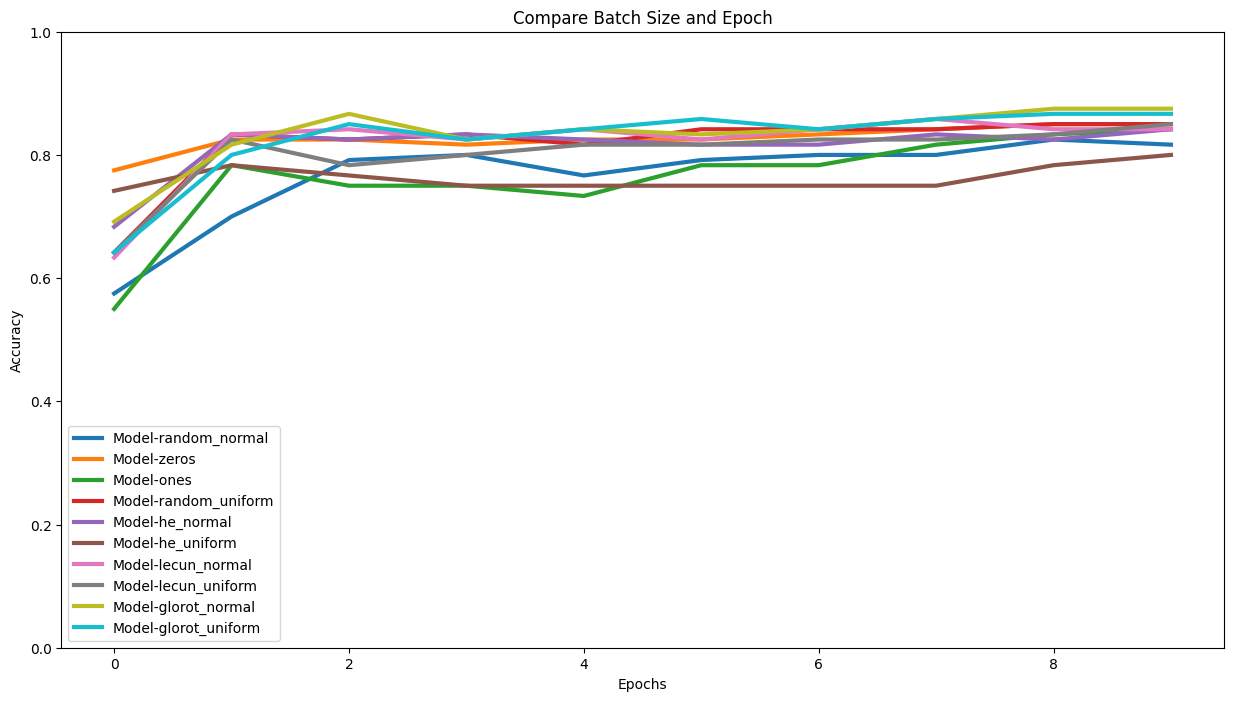

In [7]:
accuracy_measures = {}

initializer_list = ["random_normal",
                    'zeros',
                    'ones',
                    "random_uniform",
                    "he_normal",
                    "he_uniform",
                    "lecun_normal",
                    "lecun_uniform",
                    "glorot_normal",
                    "glorot_uniform"]

for initializer in initializer_list:
    model_config = base_model_config()
    X, Y = get_data()

    model_config["WEIGHTS_INITIALI4=0ZER"] = initializer
    model_name = "Model-" + initializer
    history = create_and_run_model(model_config, X, Y, model_name)

    accuracy_measures[model_name] = history.history["accuracy"]

plot_graph(accuracy_measures, "Compare Batch Size and Epoch")

After running experiment , the following observations were made:
- Model **glorot_normal** performed better than the rest
- Model **he_uniform** performed poorly

After running the experiment, the following results were obtained:

- Optimal batch size is 16
- Optimal epoch is 25
- Optimal number of layers is 2-3
- Optimal number of nodes is 16
- Best activation function is Tanh
- Best weight initialization is glorot_normal
- Best result with adjusted hyperparameters is 0.98